In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:/Users/singh/Downloads/raW1.csv' 
data = pd.read_csv(file_path)

In [2]:
print(data)

          Make          Model  Index  RawData_1  RawData_2  RawData_3  \
0          DJI    Inspire1Pro      1       -106       -342       -318   
1          DJI     Matrice100      1         59        195        151   
2          DJI   Matrice600-1      1         95          3       -145   
3          DJI   Matrice600-2      1        488         32       -344   
4          DJI       Phantom3      1        386        -22       -214   
5          DJI  Phantom4Pro-1      1        -62        -54       -250   
6          DJI  Phantom4Pro-2      1        160        364        284   
7       FlySky           FST6      1       -108         32         84   
8       Futaba           T8FG      1       -101       -229       -197   
9     Graupner           MC32      1        298        166       -182   
10   HobbyKing          HKT6A      1        -76        216        400   
11  JetiDuplex           DC16      1        322        290         26   
12    Spektrum           DX5e      1       -269    

In [2]:
bd = np.transpose(data)
bd = bd.drop(index='Make')
bd = bd.drop(index='CroppedData')
bd = bd.drop(index='NumSamples')
bd = bd.drop(index='Duration')
bd = bd.drop(index='Fs')
bd = bd.drop(index='Features')
bd = bd.drop(index='ScaleFactor')
bd = bd.drop(index='Index')
bd = bd.drop(index='Model')

In [3]:
column_names = ['DJI1', 'DJI2', 'DJI3', 'DJI4', 'DJI5', 'DJI6','DJI7', 'DJI8', 'DJI9', 'DJI10', 'DJI11', 'DJI12', 'DJI13', 'DJI14', 'DJI15', 'DJI16', 'DJI17']
bd.columns = column_names
# print(bd)

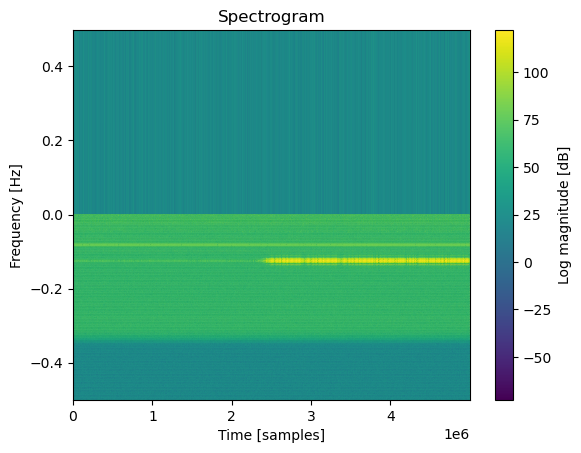

In [8]:
signal = bd['DJI1'].values

window_size = 256  # size of the sliding window
hop_size = window_size // 2  # step size for the sliding window
nfft = 512  # number of FFT points

window = np.hanning(window_size)

frequencies, times, spectrogram = [], [], []

for start in range(0, len(signal) - window_size, hop_size):
    segment = signal[start:start + window_size] * window
    spectrum = np.fft.fft(segment, n=nfft)
    squared_magnitude = np.abs(spectrum) ** 2
    frequencies.append(np.fft.fftfreq(nfft))
    times.append(start)
    spectrogram.append(squared_magnitude)

frequencies = np.array(frequencies)
times = np.array(times)
spectrogram = np.array(spectrogram)

plt.pcolormesh(times, frequencies[0], 10 * np.log10(spectrogram.T), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [samples]')
plt.title('Spectrogram')
plt.colorbar(label='Log magnitude [dB]')
plt.show()

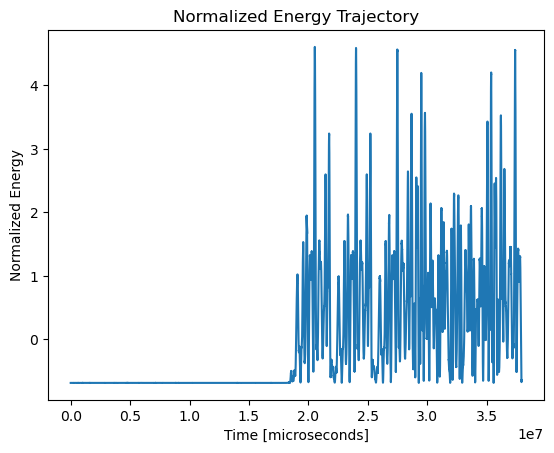

In [9]:
sampling_rate = 20000000000 * 6.59E-06

energy_trajectory = np.max(spectrogram, axis=1)

normalized_energy_trajectory = (energy_trajectory - np.mean(energy_trajectory)) / np.std(energy_trajectory)
times_in_microseconds = (times / sampling_rate) * 1e6
# delta_mean = np.diff(normalized_energy_trajectory)
# delta_variance = np.diff(np.square(normalized_energy_trajectory))

# index_of_max_change = np.argmax(np.abs(delta_mean))

plt.figure()
plt.plot(times_in_microseconds, normalized_energy_trajectory)
plt.title('Normalized Energy Trajectory')
plt.xlabel('Time [microseconds]')
plt.ylabel('Normalized Energy')

plt.show()

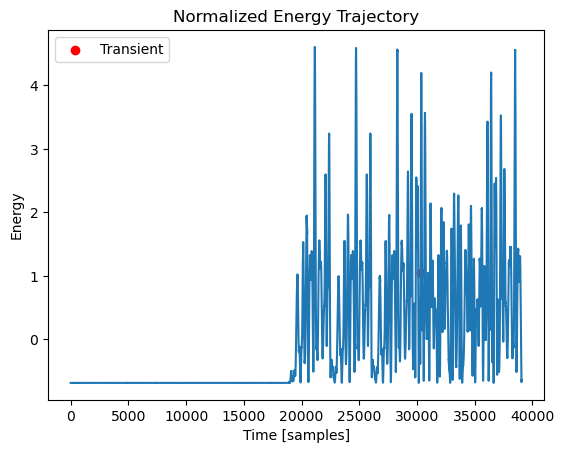

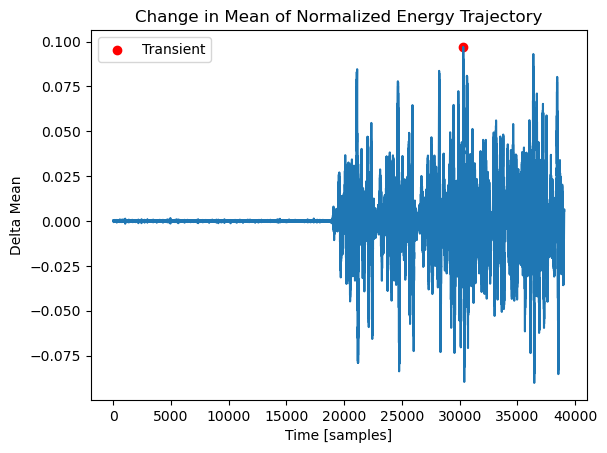

In [10]:
delta_mean = np.diff(normalized_energy_trajectory)
delta_variance = np.diff(np.square(normalized_energy_trajectory))

index_of_max_change = np.argmax(np.abs(delta_mean))

plt.figure()
plt.plot(normalized_energy_trajectory)
plt.title('Normalized Energy Trajectory')
plt.xlabel('Time [samples]')
plt.ylabel('Energy')

plt.scatter(index_of_max_change, normalized_energy_trajectory[index_of_max_change], color='red', label='Transient')
plt.legend()
plt.show()


plt.figure()
plt.plot(delta_mean)
plt.title('Change in Mean of Normalized Energy Trajectory')
plt.xlabel('Time [samples]')
plt.ylabel('Delta Mean')

plt.scatter(index_of_max_change, delta_mean[index_of_max_change], color='red', label='Transient')
plt.legend()
plt.show()

In [12]:
signal1 = bd['DJI1'].values
signal2 = bd['DJI2'].values
signal3 = bd['DJI3'].values
signal4 = bd['DJI4'].values
signal5 = bd['DJI5'].values
signal6 = bd['DJI6'].values
signal7 = bd['DJI7'].values
signal8 = bd['DJI8'].values
signal9 = bd['DJI9'].values
signal10 = bd['DJI10'].values
signal11 = bd['DJI11'].values
signal12 = bd['DJI12'].values
signal13 = bd['DJI13'].values
signal14 = bd['DJI14'].values
signal15 = bd['DJI15'].values
signal16 = bd['DJI16'].values
signal17 = bd['DJI17'].values

In [14]:
signals = [signal1, signal2, signal3, signal4, signal5, signal6, signal7, signal8,
           signal9, signal10, signal11, signal12, signal13, signal14, signal15, signal16, signal17]

all_frequencies = []
all_times = []
all_spectrograms = []
all_energy_trajectories = []
all_normalized_energy_trajectories = []
all_times_in_microseconds = []
all_delta_means = []
all_delta_variances = []
all_indices_of_max_change = []

for idx, signal in enumerate(signals, start=1):
    frequencies, times, spectrogram = [], [], []
    
    for start in range(0, len(signal) - window_size, hop_size):
        segment = signal[start:start + window_size] * window
        spectrum = np.fft.fft(segment, n=nfft)
        squared_magnitude = np.abs(spectrum) ** 2
        frequencies.append(np.fft.fftfreq(nfft))
        times.append(start)
        spectrogram.append(squared_magnitude)
    
    frequencies = np.array(frequencies)
    times = np.array(times)
    spectrogram = np.array(spectrogram)
    
    energy_trajectory = np.max(spectrogram, axis=1)
    
    normalized_energy_trajectory = (energy_trajectory - np.mean(energy_trajectory)) / np.std(energy_trajectory)
    
    times_in_microseconds = (times / sampling_rate) * 1e6
    
    delta_mean = np.diff(normalized_energy_trajectory)
    delta_variance = np.diff(np.square(normalized_energy_trajectory))
    
    index_of_max_change = np.argmax(np.abs(delta_mean))
    
    all_frequencies.append(frequencies)
    all_times.append(times)
    all_spectrograms.append(spectrogram)
    all_energy_trajectories.append(energy_trajectory)
    all_normalized_energy_trajectories.append(normalized_energy_trajectory)
    all_times_in_microseconds.append(times_in_microseconds)
    all_delta_means.append(delta_mean)
    all_delta_variances.append(delta_variance)
    all_indices_of_max_change.append(index_of_max_change)

In [11]:
from scipy.stats import skew, kurtosis

energy_transient = normalized_energy_trajectory[index_of_max_change:]

mean_energy_transient = np.mean(energy_transient)

std_energy_transient = np.std(energy_transient)

variance_energy_transient = std_energy_transient ** 2

skewness_energy_transient = skew(energy_transient)
kurtosis_energy_transient = kurtosis(energy_transient)

p = np.abs(np.fft.fft(energy_transient)) ** 2
p = p / np.sum(p)  
energy_spectral_entropy = -np.sum(p * np.log2(p))

print(f"Mean: {mean_energy_transient}")
print(f"Standard Deviation: {std_energy_transient}")
print(f"Variance: {variance_energy_transient}")
print(f"Skewness: {skewness_energy_transient}")
print(f"Kurtosis: {kurtosis_energy_transient}")
print(f"Energy Spectral Entropy: {energy_spectral_entropy}")

Mean: 0.7749306871888658
Standard Deviation: 1.0104161506378038
Variance: 1.0209407974697169
Skewness: 1.0029126932404833
Kurtosis: 1.1362408172758212
Energy Spectral Entropy: 4.8554196827219975


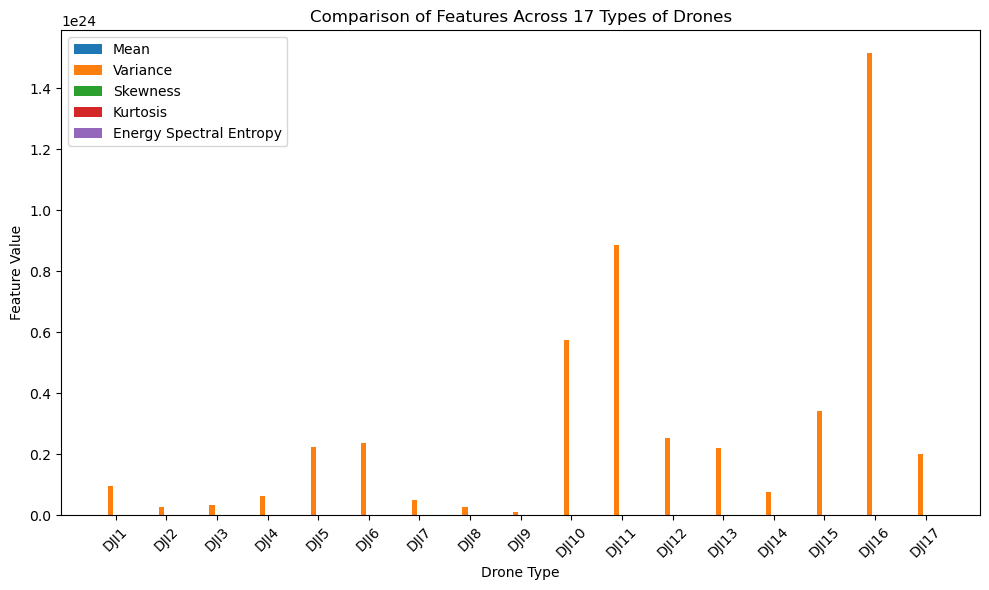

In [15]:
def extract_features(energy_transient):
    mean_energy_transient = np.mean(energy_transient)
    std_energy_transient = np.std(energy_transient)
    variance_energy_transient = std_energy_transient ** 2
    skewness_energy_transient = skew(energy_transient)
    kurtosis_energy_transient = kurtosis(energy_transient)
    
    p = np.abs(np.fft.fft(energy_transient)) ** 2
    p = p / np.sum(p)  
    energy_spectral_entropy = -np.sum(p * np.log2(p))
    
    return {
        'Mean': mean_energy_transient,
        'Variance': variance_energy_transient,
        'Skewness': skewness_energy_transient,
        'Kurtosis': kurtosis_energy_transient,
        'Energy Spectral Entropy': energy_spectral_entropy
    }

drones_features = {}
for drone_type, energy_transient in zip(range(1, 18), all_energy_trajectories):
    features = extract_features(energy_transient)
    drones_features[f"DJI{drone_type}"] = features

feature_names = ['Mean', 'Variance', 'Skewness', 'Kurtosis', 'Energy Spectral Entropy']
x = np.arange(len(drones_features)) 
width = 0.1 

fig, ax = plt.subplots(figsize=(10, 6))

for i, feature in enumerate(feature_names):
    values = [drones_features[drone][feature] for drone in drones_features]
    ax.bar(x + i * width, values, width, label=feature)

ax.set_xlabel('Drone Type')
ax.set_ylabel('Feature Value')
ax.set_title('Comparison of Features Across 17 Types of Drones')
ax.set_xticks(x + 2 * width)
ax.set_xticklabels(drones_features.keys(), rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


C:\Users\singh\AppData\Local\Temp\ipykernel_16728\3890332860.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[3].set_xticklabels(drone_types, rotation=45)


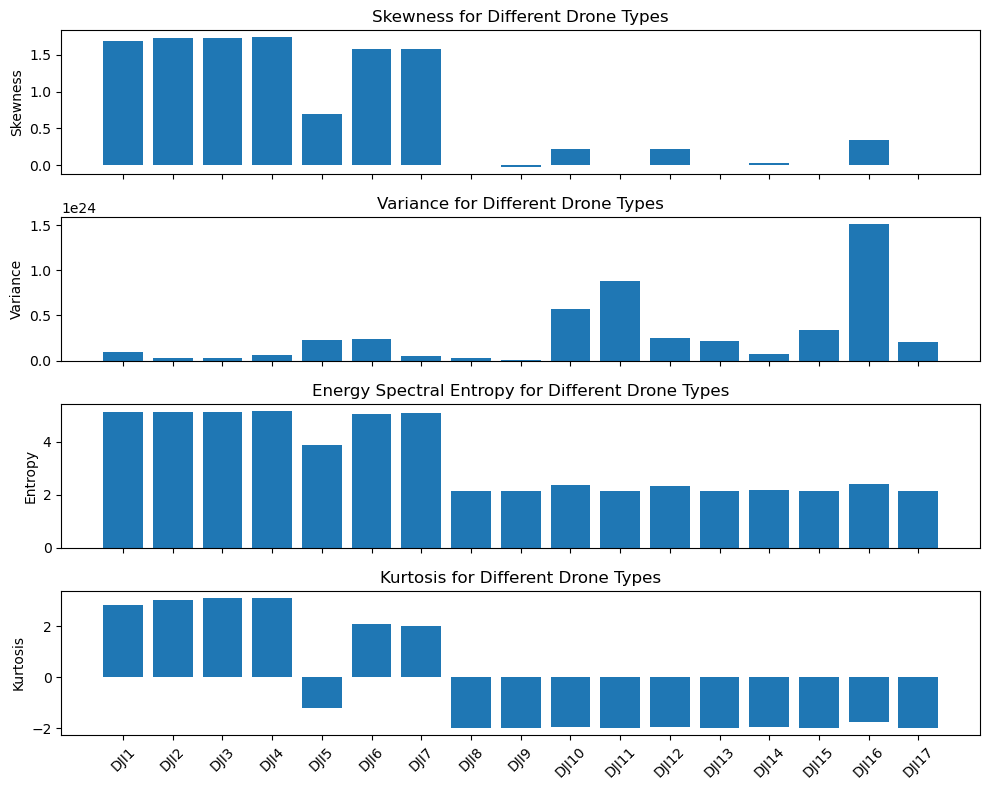

In [16]:
drone_types = list(drones_features.keys())

skewness = [drones_features[drone]['Skewness'] for drone in drone_types]
variance = [drones_features[drone]['Variance'] for drone in drone_types]
entropy = [drones_features[drone]['Energy Spectral Entropy'] for drone in drone_types]
kurtosis = [drones_features[drone]['Kurtosis'] for drone in drone_types]

fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

axs[0].bar(drone_types, skewness)
axs[0].set_ylabel('Skewness')
axs[0].set_title('Skewness for Different Drone Types')

axs[1].bar(drone_types, variance)
axs[1].set_ylabel('Variance')
axs[1].set_title('Variance for Different Drone Types')

axs[2].bar(drone_types, entropy)
axs[2].set_ylabel('Entropy')
axs[2].set_title('Energy Spectral Entropy for Different Drone Types')

axs[3].bar(drone_types, kurtosis)
axs[3].set_ylabel('Kurtosis')
axs[3].set_title('Kurtosis for Different Drone Types')
axs[3].set_xticklabels(drone_types, rotation=45)

plt.tight_layout()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

X = np.array([skewness, variance, entropy, kurtosis]).T
y = np.array(drone_types)

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred, labels=np.arange(len(le.classes_)), target_names=le.classes_, zero_division=1))

              precision    recall  f1-score   support

        DJI1       1.00      0.00      0.00       1.0
       DJI10       0.00      1.00      0.00       0.0
       DJI11       1.00      1.00      1.00       0.0
       DJI12       0.00      1.00      0.00       0.0
       DJI13       1.00      1.00      1.00       0.0
       DJI14       0.00      1.00      0.00       0.0
       DJI15       1.00      1.00      1.00       0.0
       DJI16       1.00      0.00      0.00       1.0
       DJI17       1.00      1.00      1.00       0.0
        DJI2       1.00      0.00      0.00       1.0
        DJI3       0.00      1.00      0.00       0.0
        DJI4       1.00      1.00      1.00       0.0
        DJI5       1.00      1.00      1.00       0.0
        DJI6       1.00      0.00      0.00       1.0
        DJI7       1.00      1.00      1.00       0.0
        DJI8       1.00      1.00      1.00       0.0
        DJI9       1.00      1.00      1.00       0.0

   micro avg       0.00   